<a href="https://colab.research.google.com/github/Solomon9702/TIL/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

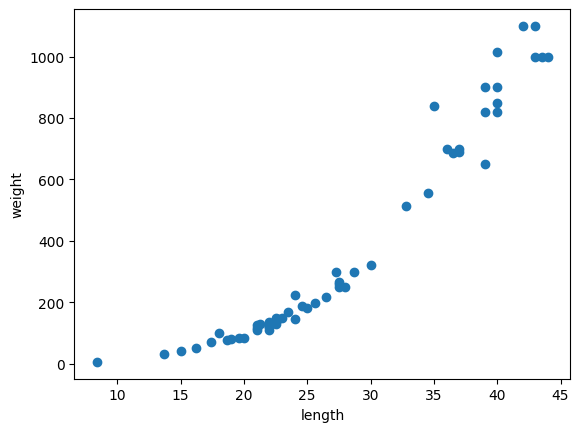

In [3]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
# 훈련 세트와 테스트 세트 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight
)

In [5]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [6]:
from sklearn.neighbors import KNeighborsRegressor

# 객체 생성
knr = KNeighborsRegressor()

# k - 최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [7]:
# 결정계수
knr.score(test_input, test_target)

0.9914681761618059

## 결정계수
-  $R^2 = 1 - \frac{(타깃 - 예측)^2의합}{(타깃-평균)^2의 합}$
- 타깃의 평균 정도를 예측하는 수준이라면 $R^2$는 0에 가까워지고, 예측이 타깃에 아주 가까워지면 1에 가까운 값이 된다

In [8]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 구합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)


19.720000000000002


In [9]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3

# 모델 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9785625919536737


In [10]:
print(knr.score(test_input, test_target))

0.9841280845177788


# 선형 회귀

In [11]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [18]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [20]:
print(knr.predict([[50]]))

[1033.33333333]


- 50cm 농어의 무게를 1,033g정도로 예측하였음 -> 실제 이 농어의 무게는 훨씬 더 많이 나감

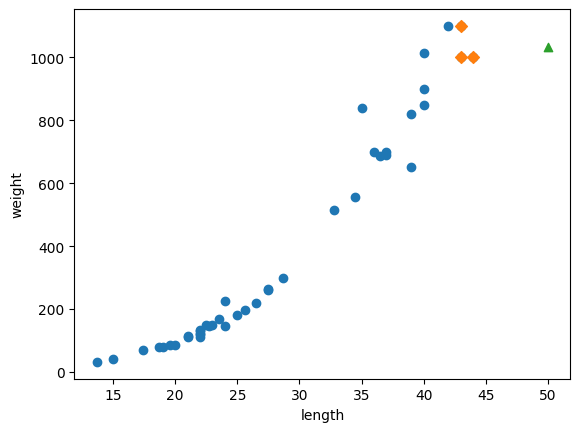

In [22]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다.
distance, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 선형회귀

In [23]:
from sklearn.linear_model import LinearRegression
# 모델 객체 생성
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


In [24]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


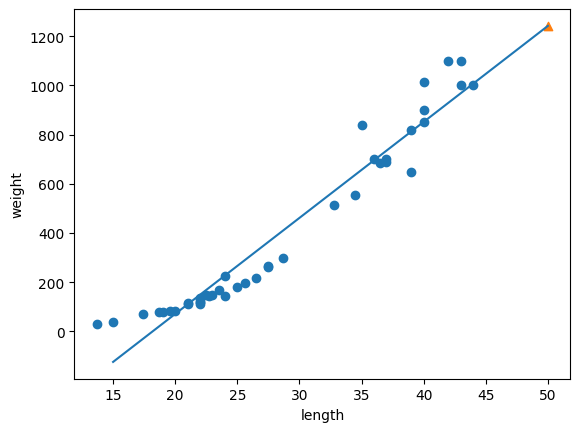

In [31]:
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프 그리기
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50,1241.8,marker='^')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()



In [32]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558
